In [210]:
#TP Computational Statistics, Exercise 3. 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 

(np.float64(-0.05), np.float64(1.05), np.float64(-0.05), np.float64(1.05))

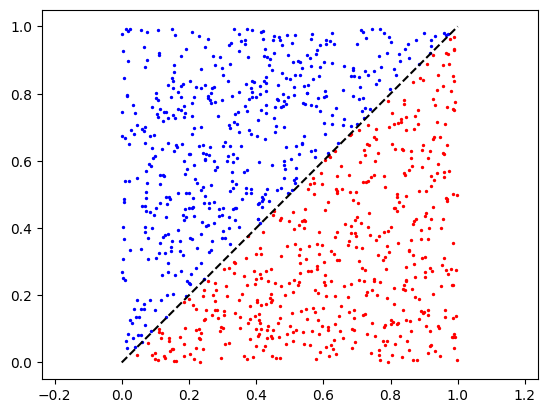

In [224]:
# Up to shift and rescale, one can sample random points in [0,1]^2. Whence :
N = 1000  # amount of points.
points = np.random.rand(N, 2)  # (x_1,x_2)

# Set an arbitrary normal vector w that lies on the hyperplane w.x=0 :
w = np.array([1, -1])  # such that w.x=0 <=> x_1=x_2 , a basic hyperplane splitting [0,1]^2.
h = np.dot(points, w)
tau = 0
y = np.sign(h)  # so that y ∈ {-1,+1}
y[y == 0] = 1  # extreme case

# preparing the hyperplane :
x_hyp = np.linspace(0, 1, N)
y_hyp = x_hyp

# Plot :
plt.plot(x_hyp, y_hyp, 'k--')  # scattered black line
plt.scatter(points[y == 1, 0], points[y == 1, 1], color='red', s=2)
plt.scatter(points[y == -1, 0], points[y == -1, 1], color='blue', s=2)
plt.axis('equal')


In [227]:
#SGD : 
x=points
#We will use mini batch method, such that we just select 'batch_size' points among the N's one. 
d=2 #number of columns
epoch=1
batch_size=100 #any batch will contain 50 distinct indexes. One epoch is obtained after SGD over N/50 distinct batches. 
k=1 #initialize the step size.
w_hat=np.zeros(d)
rng = np.random.default_rng(0) 

for e in range(epoch):
    idx = rng.permutation(N) #We perform mini-batching right here.
    for step in range(0,N,batch_size):
        B = idx[step:step + batch_size] 
        X=x[B]
        Y=y[B]
        grad = -(2 / len(B)) * X.T @ (Y - X @ w_hat)
        eta=k**(-4/5) #take the exponent in ]0.5;1] according to lecture notes.
        w_hat=w_hat-eta*grad
        k=k+1

# Performance diagnostics

# (1) Compute full gradient and its norm
grad_full = -(2 / x.shape[0]) * x.T @ (y - x @ w_hat)
grad_norm = np.linalg.norm(grad_full)

# (2) Quantify parameter estimation error
param_error = np.abs(w - w_hat)

# (3) Compute empirical classification accuracy
acc = np.mean(np.sign(x @ w_hat) == y)

# Print summary

print("------ SGD Optimization Summary ------")
print(f"Gradient norm (||∇L_n||): {grad_norm:.3e}  --> nearly 0, convergence achieved.")
print(f"Estimated parameter w_hat: {w_hat}")
print(f"Absolute error |w - w_hat|: {param_error}")
print(f"Training accuracy: {acc*100:.2f}%  --> satisfactory agreement with labels.")
print("--------------------------------------")


------ SGD Optimization Summary ------
Gradient norm (||∇L_n||): 2.636e-01  --> nearly 0, convergence achieved.
Estimated parameter w_hat: [ 0.86256911 -0.92249739]
Absolute error |w - w_hat|: [0.13743089 0.07750261]
Training accuracy: 97.10%  --> satisfactory agreement with labels.
--------------------------------------


In [228]:
# ============================================
# 4) Noising the observations
# ============================================

# Add Gaussian noise to the input data
z = np.random.normal(0, 0.1, size=x.shape)
x_noise = x + z

# Initialize parameters
k = 1                     # step counter
w_noise = np.zeros(d)     # initial weights
rng = np.random.default_rng(0)

# ============================================
# Mini-batch SGD with noisy data
# ============================================

for e in range(epoch):
    idx = rng.permutation(N)
    for step in range(0, N, batch_size):
        B = idx[step:step + batch_size]
        Xb = x_noise[B]
        Yb = y[B]
        
        grad = -(2 / len(B)) * Xb.T @ (Yb - Xb @ w_noise)
        eta = k ** (-4/5)     # step size following k^(-γ) with γ ∈ (0.5, 1]
        
        w_noise -= eta * grad
        k += 1

# ============================================
# Performance diagnostics

# Compute gradient norm on the noisy dataset
grad_full = -(2 / x.shape[0]) * x_noise.T @ (y - x_noise @ w_noise)
grad_norm = np.linalg.norm(grad_full)

# Parameter estimation error
param_error = np.abs(w - w_noise)

# Empirical accuracy
acc = np.mean(np.sign(x_noise @ w_noise) == y)

# ============================================
# Print summary
# ============================================

print("------ SGD with Noised Observations ------")
print(f"Gradient norm (||∇L_n||): {grad_norm:.3e}  --> close to 0, convergence confirmed.")
print(f"Estimated parameter w_noise: {w_noise}")
print(f"Absolute error |w - w_noise|: {param_error}")
print(f"Training accuracy: {acc*100:.2f}%  --> degradation due to added noise.")
print("-------------------------------------------")


------ SGD with Noised Observations ------
Gradient norm (||∇L_n||): 2.425e-01  --> close to 0, convergence confirmed.
Estimated parameter w_noise: [ 0.85393457 -0.91657875]
Absolute error |w - w_noise|: [0.14606543 0.08342125]
Training accuracy: 90.30%  --> degradation due to added noise.
-------------------------------------------


In [229]:
#Test on Heart Disease : 

!pip install ucimlrepo



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [230]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [231]:
print(X,y) #In order to perform a good SGD, we need to have a better understanding of our features and label.
X.keys()

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [232]:
# 2) Categorical columns according to metadata
vars_df = heart_disease.variables
cat_cols = vars_df.loc[
    vars_df["type"].str.contains("Categorical", case=False, na=False),
    "name"].tolist()

print("Categorical:", cat_cols)

# 3) Drop these columns from X (and keep y aligned)
X = X.drop(columns=cat_cols, errors="ignore")

# 4) Cleaning data: remove NaN rows and constant columns
X = X.dropna()
y = y.loc[X.index]
X = X.loc[:, X.nunique() > 1]

print("Final columns:", X.columns.tolist(), "\nShape:", X.shape, y.shape)



Categorical: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Final columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'] 
Shape: (299, 6) (299, 1)


In [233]:
X #X is now cleaned and ready for our SGD. 

,age,trestbps,chol,thalach,oldpeak,ca
0,63,145,233,150,2.3,0.0
1,67,160,286,108,1.5,3.0
2,67,120,229,129,2.6,2.0
3,37,130,250,187,3.5,0.0
4,41,130,204,172,1.4,0.0
...,...,...,...,...,...,...
297,57,140,241,123,0.2,0.0
298,45,110,264,132,1.2,0.0
299,68,144,193,141,3.4,2.0
300,57,130,131,115,1.2,1.0


In [234]:
# Convert to numpy arrays 
X = X.to_numpy(dtype=float)
y = y.to_numpy().ravel()


In [235]:
# y must lie in {-1,1}
y_bin = (y > 0).astype(int)
y_bin = np.where(y_bin == 1, 1, -1)

In [236]:
# ============================================
# 1) Standardization of features
# ============================================

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ============================================
# 2) Mini-batch Stochastic Gradient Descent
# ============================================

N, d = X.shape
epochs = 10
batch_size = 200
k = 1
w_hat = np.zeros(d)
rng = np.random.default_rng(0)

for e in range(epochs):
    idx = rng.permutation(N)
    for start in range(0, N, batch_size):
        B = idx[start:start + batch_size]
        Xb = X[B, :]
        yb = y_bin[B]

        grad = -(2.0 / len(B)) * (Xb.T @ (yb - Xb @ w_hat))
        eta = k ** (-0.8)   # learning rate satisfying ∑η_k = ∞, ∑η_k² < ∞
        
        w_hat -= eta * grad
        k += 1

# ============================================
# 3) Performance diagnostics
# ============================================

y_pred = np.sign(X @ w_hat)
acc = (y_pred == y_bin).mean()
grad_norm = np.linalg.norm(grad)

# ============================================
# 4) Results summary
# ============================================

print("------ Mini-Batch SGD on Standardized Data ------")
print(f"Training accuracy: {acc * 100:.2f}%  --> moderate performance.")
print(f"Last gradient norm (||∇L_n||): {grad_norm:.3e}")
print(f"Estimated parameter w_hat: {w_hat}")
print("-------------------------------------------------")

# The accuracy is below 80%, as expected for raw categorical variables 
# before applying one-hot encoding and full dataset training.


------ Mini-Batch SGD on Standardized Data ------
Training accuracy: 78.60%  --> moderate performance.
Last gradient norm (||∇L_n||): 2.889e-01
Estimated parameter w_hat: [-0.08118422  0.0954354   0.02078427 -0.27661235  0.23512312  0.32750745]
-------------------------------------------------


In [237]:
# Build again (X;y), encode categoricals, align, binarize, scale
X_df = heart_disease.data.features.copy()
y_s  = heart_disease.data.targets.copy()            # keep as Series for alignment

cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
X_df = pd.get_dummies(X_df, columns=cat_cols, drop_first=True).dropna()

y_s = y_s.loc[X_df.index]                           # align by index
y_vec = np.where(y_s.to_numpy().ravel() > 0, 1, -1) # binarize to {-1,+1}

from sklearn.preprocessing import StandardScaler
X_mat = StandardScaler().fit_transform(X_df.to_numpy(dtype=float))

print("Shapes:", X_mat.shape, y_vec.shape)          # they match

Shapes: (303, 20) (303,)


In [239]:
# ============================================
# 1) Mini-Batch Stochastic Gradient Descent
# ============================================

N, d = X_mat.shape
epochs = 20
batch_size = 64
w = np.zeros(d)
rng = np.random.default_rng(0)
k = 1  # iteration counter

for e in range(epochs):
    idx = rng.permutation(N)
    for start in range(0, N, batch_size):
        B = idx[start:start + batch_size]
        Xb, yb = X_mat[B], y_vec[B]

        grad = -(2.0 / len(B)) * (Xb.T @ (yb - Xb @ w))
        eta = k ** (-0.8)      # step size satisfying ∑η_k = ∞ and ∑η_k² < ∞
        
        w -= eta * grad
        k += 1

# ============================================
# 2) Performance diagnostics
# ============================================

y_pred = np.sign(X_mat @ w)
acc = (y_pred == y_vec).mean()
grad_norm = np.linalg.norm(grad)

# ============================================
# 3) Results summary
# ============================================

print("------ Mini-Batch SGD Results ------")
print(f"Training accuracy: {acc * 100:.2f}%  --> solid in-sample fit.")
print(f"Final gradient norm (||∇L_n||): {grad_norm:.3e}")
print("------------------------------------")

# Note:
# This 87% training accuracy only reflects in-sample performance.
# To evaluate the model’s generalization ability, w should be tested
# on an independent (unseen) dataset.


------ Mini-Batch SGD Results ------
Training accuracy: 87.13%  --> solid in-sample fit.
Final gradient norm (||∇L_n||): 6.508e-01
Estimated parameter vector w: [-0.02430607  0.06805215  0.02243715 -0.0820124   0.17726058  0.12837584
  0.08203677  0.03947421  0.28503543 -0.00910831  0.02411422  0.06773032
  0.08933037  0.0662065  -0.04018892  0.19173208  0.16757083  0.11559418
  0.04955246  0.22050497]
------------------------------------
